In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

### Constants

In [2]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [3]:
df = pd.read_csv('data/lane_changes_updated/lane_change_8.csv', sep=';')
#df = pd.read_csv('data/normal_drive.csv', sep=';')
#df = pd.read_csv('data/lane_changes_updated/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/20Hz/Vehicle-IMU-Acceleration-31.csv', sep=';')
#df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
#df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-24.csv', sep=';')
#df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
#df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df_AngularVel = pd.read_csv('data/2022-09-21_LaneChanges/AngularVelocities_Separated/Vehicle-IMU-AngularVelocities-50Hz-30.csv', sep=';')
#df_AngularVel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df = pd.concat([df_Accel, df_AngularVel], axis=1)
#df = pd.read_csv('data/lane_changes/20Hz/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/lane_changes/normal_drive.csv', sep=';')



'''
# LATEST: 
df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/5Hz/Vehicle-IMU-Acceleration-30.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/5Hz/SteeringWheelAngle-30.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)
'''

#df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

"\n# LATEST: \ndf_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/5Hz/Vehicle-IMU-Acceleration-30.csv', sep=';')\ndf_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']\ndf_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])\n\ndf_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/5Hz/SteeringWheelAngle-30.csv', sep=';')\ndf_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])\n\ndf = pd.concat([df_Accel, df_Steering], axis=1)\n"

In [6]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [55]:
'''
df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)
'''

df['accel_lon'] = df['accel_lon'].add(OFFSET)
df['accel_trans'] = df['accel_trans'].add(OFFSET)
df['accel_down'] = df['accel_down'].add(OFFSET)

df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)

df['lat'] = df.apply(lambda x: int(x['lat']*FACTOR_MULTIPLY) , axis=1)
df['lon'] = df.apply(lambda x: int(x['lon']*FACTOR_MULTIPLY) , axis=1)
df['speed'] = df.apply(lambda x: int(x['speed']*FACTOR_MULTIPLY) , axis=1)

### Morton indexing

In [56]:
#resolution = 18; dimension = 2
#hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

#points = df[['accel_lon','accel_trans']].to_numpy()

# Generate Hilbert index
#distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
#df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)
'''
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

df['morton'] = df.apply(set_value, axis=1)
'''

m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['accel_lon']), int(row['accel_trans']))

df['morton'] = df.apply(set_value, axis=1)

### Morton Plots

### Scatter Plots

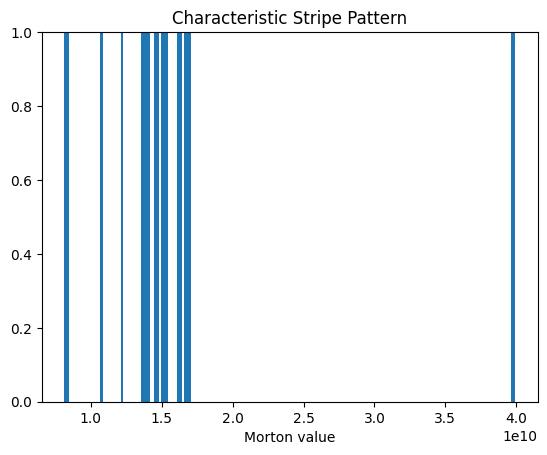

In [57]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df['morton'], bins=200)

min = df['morton'].min()
max = df['morton'].max()
max = 30000000000
#max = 20000000000

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
#plt.xlim(1,max)
# limit x axis to take only "lane change relevant" data
#plt.xlim(9000000000,13000000000)
plt.xlabel('Morton value')

plt.title("Characteristic Stripe Pattern")

plt.show()

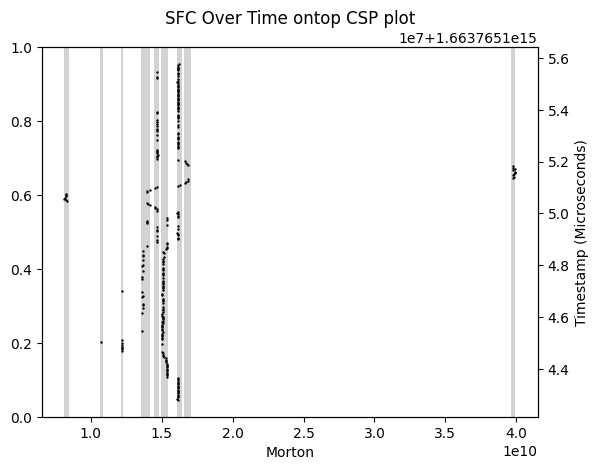

In [58]:
fig, ax = plt.subplots()

ax.hist(df['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
#ax.set_xlim([0, 40000000000])

ax2 = ax.twinx()

ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Morton')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')

plt.show()

##### 

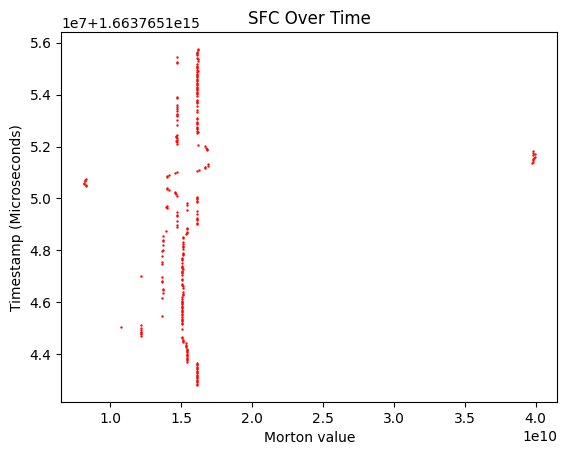

In [59]:
plt.scatter(x=df['morton'],y=df['ts'], c='red', s=0.5)
plt.title("SFC Over Time")
plt.xlabel("Morton value")
plt.ylabel("Timestamp (Microseconds)")
plt.show()
#output_df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'], title="Accelerations against Timestamp", xlabel="Timestamp (Microseconds)", ylabel="Acceleration (m/s\u00B2)")

#plt.savefig('MortonScatterTest9.png', transparent=True)

<Axes: xlabel='accel_lon', ylabel='accel_trans'>

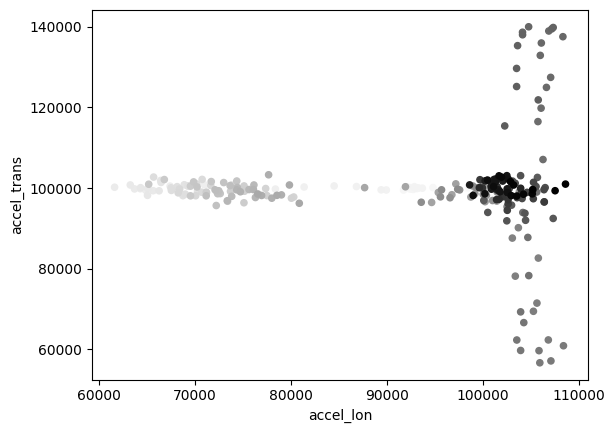

In [60]:
# 2D-plot with timestamp as color gradient
#df.plot(kind='scatter',x='SteeringWhlAngle',y='IMULatAcceleration',color=df['ts'])
df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

KeyError: 'SteeringWhlAngle'

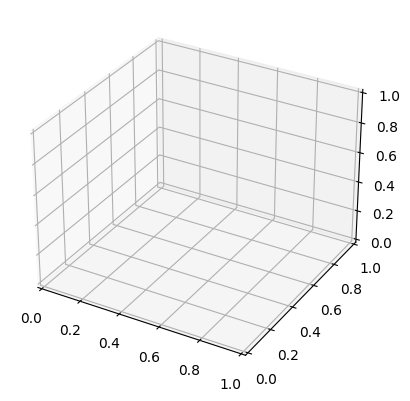

In [61]:
#creating 3D-Plot
ax = plt.axes(projection ="3d")
ax.scatter3D(df['SteeringWhlAngle'],df['IMULatAcceleration'], color = "green")

### multidimensional plot

<Axes: title={'center': 'Accelerations against Timestamp'}, xlabel='Timestamp (Microseconds)', ylabel='Acceleration (m/s²)'>

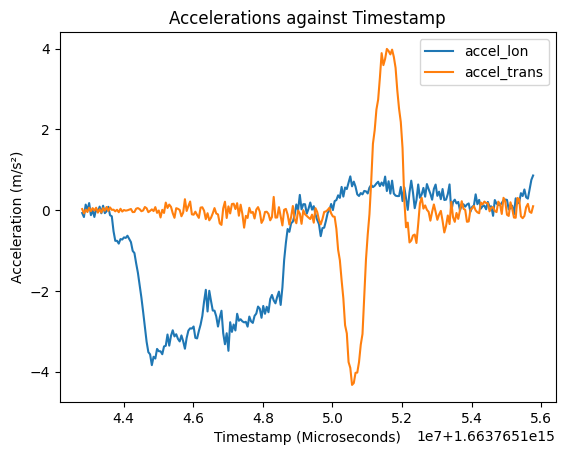

In [4]:
# Plot result
#df.plot(x = 'IMULatAcceleration', y = 'SteeringWhlAngle')
#df.plot(x = 'ts', y = ['SteeringWhlAngle', 'IMULatAcceleration'])
df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'], title="Accelerations against Timestamp", xlabel="Timestamp (Microseconds)", ylabel="Acceleration (m/s\u00B2)")